In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic=pd.read_csv('/home/vinod/Downloads/train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [8]:
titanic.fillna(titanic.mean(),inplace=True)

In [9]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


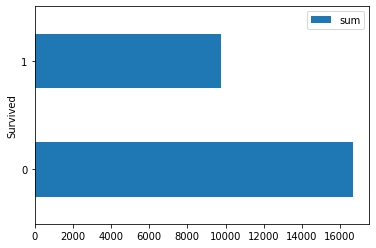

In [11]:
titanic.groupby('Survived')['Age'].agg(['sum']).plot(kind='barh')

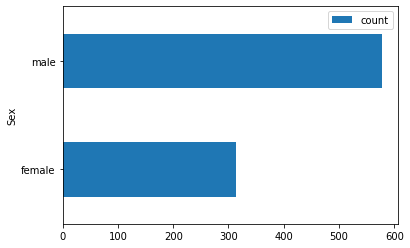

In [12]:
titanic.groupby('Sex')['Survived'].agg(['count']).plot(kind='barh')

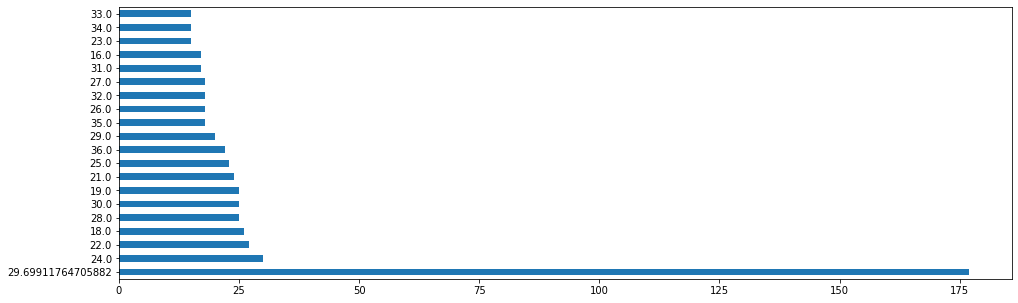

In [13]:
titanic['Age'].value_counts().head(20).plot(kind='barh',figsize=(16,5))

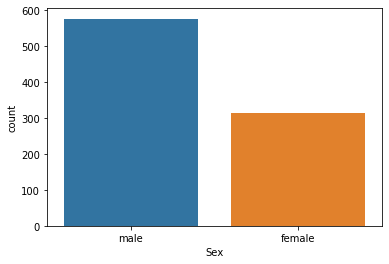

In [14]:
sns.countplot(titanic['Sex'])

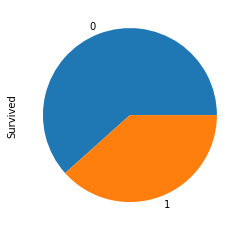

In [15]:
titanic['Survived'].value_counts().plot(kind='pie')

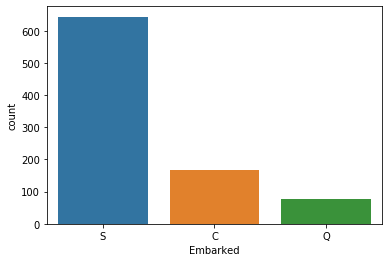

In [16]:
sns.countplot(titanic['Embarked'])

In [17]:
titanic.drop(['Name'],axis=1,inplace=True)

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
one_hot=OneHotEncoder()
one_hot.fit(titanic[['Fare','Embarked']])
one_hot.transform(titanic[['Fare','Embarked']])

<891x252 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [21]:
titanic.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [22]:
categorical=titanic[['Sex','Ticket','Embarked']]

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label=LabelEncoder()
titanic1=categorical.apply(label.fit_transform)

In [25]:
titanic1.head(2)

,Sex,Ticket,Embarked
0,1,523,2
1,0,596,0


In [26]:
titanic.drop(['Sex','Ticket','Embarked'],axis=1,inplace=True)

In [27]:
titanic.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833


In [28]:
titanic=titanic.join(titanic1)

In [29]:
titanic.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,1,523,2
1,2,1,1,38.0,1,0,71.2833,0,596,0


In [30]:
X=titanic.drop(['Survived'],axis=1)
y=titanic['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scale=StandardScaler()
scale.fit(X)
scale.fit_transform(X)

array([[-1.73010796,  0.82737724, -0.5924806 , ...,  0.73769513,
         0.91896631,  0.58111394],
       [-1.72622007, -1.56610693,  0.63878901, ..., -1.35557354,
         1.28262456, -1.93846038],
       [-1.72233219,  0.82737724, -0.2846632 , ..., -1.35557354,
         1.64628282,  0.58111394],
       ...,
       [ 1.72233219,  0.82737724,  0.        , ..., -1.35557354,
         1.67617254,  0.58111394],
       [ 1.72622007, -1.56610693, -0.2846632 , ...,  0.73769513,
        -1.64656796, -1.93846038],
       [ 1.73010796,  0.82737724,  0.17706291, ...,  0.73769513,
         0.63501397, -0.67867322]])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
model.score(X_test,y_test)

0.4400501436022538

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2,min_samples_leaf=4,min_weight_fraction_leaf=0.0,splitter='best',ccp_alpha=0.01,random_state=50)
clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10, min_samples_leaf=4,
                       random_state=50)

In [41]:
clf.score(X_test,y_test)

0.8097014925373134

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,min_samples_split=7,max_features='auto',n_jobs=-1,random_state=42)
rfc.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=7,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [44]:
pred=rfc.predict(X_test)

In [45]:
rfc.score(X_test,y_test)

0.8246268656716418

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [47]:
print('The accuracy score',accuracy_score(y_test,pred))

The accuracy score 0.8246268656716418


In [48]:
print(confusion_matrix(y_test,pred))

[[144  13]
 [ 34  77]]


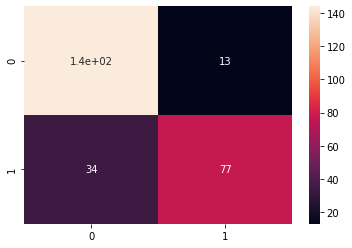

In [49]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)